# Training neural network with gradient descent

Same as last time let's start with loading data and plot them.

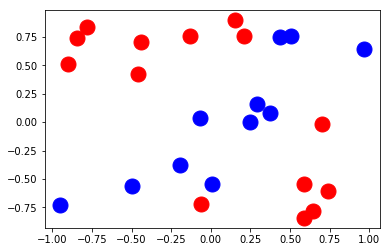

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('data2.txt')

x = data[:,0:2]
y = data[:,2]

plt.plot(x[y == 1, 0], x[y == 1, 1], 'o', color='red', markersize=15)
plt.plot(x[y == -1, 0], x[y == -1, 1], 'o', color='blue', markersize=15)

Now this is our neural network code. We are going to write a neural network object that can train itself to classify these data points.

In [2]:
# define activation function here
def g(x):
    return np.tanh(x)

# here's the derivative of activation function
def gprime(x):
    return 1.0 - g(x)**2

class NeuralNetwork:
    def __init__(self, L, alpha):
        """
        L is the layer structure for example
        L = [2,4,1]
        network has 3 layers: 
        # layer 1 has 2 units
        # layer 2 has 4 units
        # layer 3 has 1 units
        """
        
        self.L = L
        self.L[0] += 1
        self.nL = len(self.L)
        self.alpha = alpha

        # initialize weight with random numbers
        self.W = []
        for l in range(1, self.nL):
            w = np.random.uniform(high=0.25, low=-0.25, size=(self.L[l - 1], self.L[l]))
            self.W.append(w)

        # initialize activity to be ones
        self.a = []
        for l in range(0, self.nL):
            tmp = np.ones(self.L[l])
            self.a.append(tmp)

        # initialize current to be zeros
        self.z = []
        for l in range(0, self.nL):
            tmp = np.zeros(self.L[l])
            self.z.append(tmp)

        # initialize deltas: this variable contains gradient w.r.t neural network weights
        self.deltas = []
        for l in range(self.nL-1):
            tmp = np.zeros(self.L[l])
            self.deltas.append(tmp)

    def forward_propagate(self, x):
        """
        This function calculates the activity of all neural network units given input x.
        """
        x = np.atleast_2d(x)
        tmp = np.ones((x.shape[0], 1))
        x = np.hstack((x, tmp))
        self.a[0] = x

        for l in range(self.nL-1):
            self.z[l+1] = np.dot(self.a[l], self.W[l])
            self.a[l+1] = g(self.z[l+1])
        return self.a[-1]

    def back_propagate(self, x, y):
        """
        This function calculates the gradient cost function w.r.t neural network weights.
        Gradient is calculated using backpropagation algorithm.
        """
        self.forward_propagate(x)

        error = y - self.a[-1]
        self.deltas[-1] = np.atleast_2d(error * gprime(self.z[-1]))

        for l in range(self.nL - 2, 0, -1):
            self.deltas[l-1] = np.dot(self.deltas[l], self.W[l].T)*gprime(self.z[l])
        
        # This code update the neural network weights based on calculated gradient.
        for l in range(self.nL-1):
            self.W[l] += self.alpha * np.dot(self.a[l].T, self.deltas[l])

    def train(self, x, y, epochs=5000):
        """
        This code runs a for loop over and over. Update the neural network weights at each loop
        """
        
         # check if dimension of x is correct
        if x.shape[1] != self.L[0] - 1:
            raise ValueError('x has wrong dimension')

        for iter in range(1, epochs):
            for s in range(x.shape[0]):
                self.back_propagate(x[s], y[s])
                
            # for fun we asks it to print classification accuracy every 100 iterations
            if iter % 100 == 0:
                print("iter {}: accuracy {}".format(iter, self.classify(x, y)))

            
    def classify(self, x, y):
        """
        This code asks neural network to classify data points in x, assess classification accuracy, and output it.
        """
        correct = 0
        for s in range(x.shape[0]):
            self.forward_propagate(x[s])
            if self.a[-1] > 0:
                c = 1.0
            else:
                c = -1.0
            if c == y[s]:
                correct += 1
        return correct/x.shape[0]

# Train the neural network to classify our data

In [5]:
nn = NeuralNetwork([2, 5, 1], 0.01)
data = np.loadtxt('data2.txt')

x = np.array(data[:,0:2])
y = np.array(data[:,2]).T
y[y==0] = -1

nn.train(x, y, epochs=1000)

iter 100: accuracy 0.36
iter 200: accuracy 0.36
iter 300: accuracy 0.36
iter 400: accuracy 0.68
iter 500: accuracy 0.92
iter 600: accuracy 1.0
iter 700: accuracy 1.0
iter 800: accuracy 1.0
iter 900: accuracy 1.0
